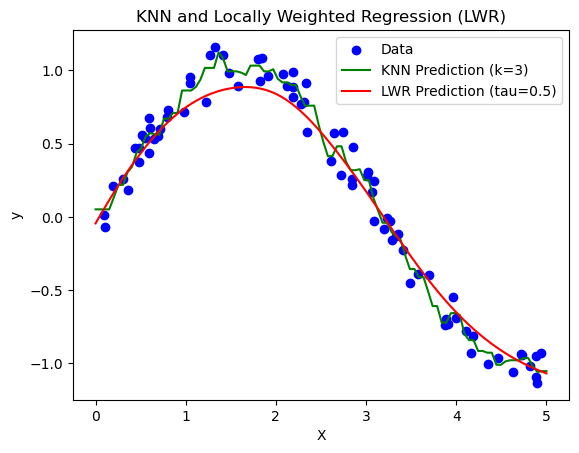

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

# Generate data
np.random.seed(0)
X = np.sort(5 * np.random.rand(80, 1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.1, X.shape[0])

# Locally Weighted Regression
def locally_weighted_regression(query_point, X, y, tau):
    X_bias = np.c_[np.ones(X.shape[0]), X]
    weights = np.exp(-np.sum((X_bias - [1, query_point])**2, axis=1) / (2 * tau**2))
    W = np.diag(weights)
    theta = np.linalg.pinv(X_bias.T @ W @ X_bias) @ X_bias.T @ W @ y
    return np.dot([1, query_point], theta)

# K-Nearest Neighbors Regression
def knn_regression(X_train, y_train, X_test, k=3):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    return knn.predict(X_test)

# Plotting
def plot_result(X, y, y_knn_pred, y_lwr_pred, X_test):
    plt.scatter(X, y, color='blue', label='Data')
    plt.plot(X_test, y_knn_pred, color='green', label='KNN Prediction (k=3)')
    plt.plot(X_test, y_lwr_pred, color='red', label='LWR Prediction (tau=0.5)')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('KNN and Locally Weighted Regression (LWR)')
    plt.legend()
    plt.show()

# Parameters
tau = 0.5
k = 3
X_test = np.linspace(0, 5, 100)

# Predictions
y_lwr_pred = np.array([locally_weighted_regression(x, X, y, tau) for x in X_test])
y_knn_pred = knn_regression(X, y, X_test.reshape(-1, 1), k=k)

# Plot results
plot_result(X, y, y_knn_pred, y_lwr_pred, X_test)
